Question 1

Text(0.5, 1.0, 'Transformed Image')

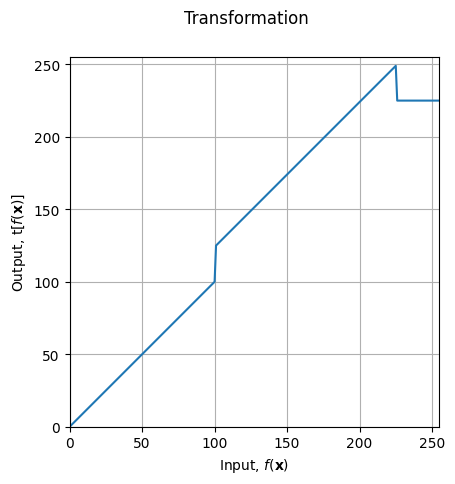

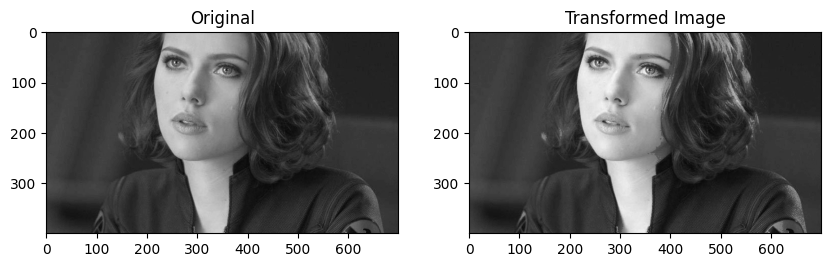

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#Importing the original image in grayscale
im = cv.imread('natasha_grayscale.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

t1 = np.linspace(0, 100, 101).astype('uint8')
t2 = np.linspace(125, 249, 125).astype('uint8')
t3 = np.linspace(225, 225, 30).astype('uint8')

#Transformation
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

fig, ax = plt.subplots()
fig.suptitle("Transformation")
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{t}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.grid()

image_transform = cv.LUT(im, transform)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(im, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(image_transform, cmap='gray')
ax[1].set_title("Transformed Image")

Question 2

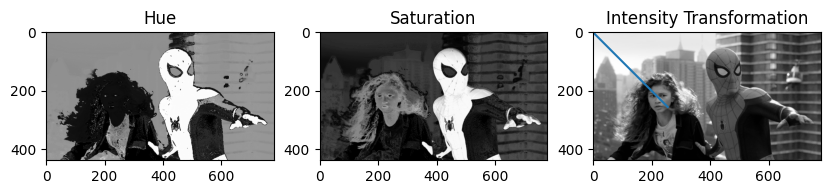

Text(0.5, 1.0, 'Vibrance Enhanced Image')

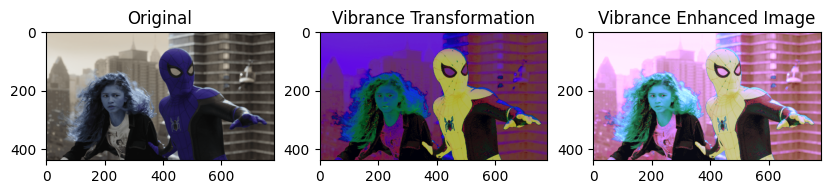

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#importing the original image
im = cv.imread('spider.png', cv.IMREAD_COLOR)
assert im is not None

im_HSV = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h_img, s_img, v_img = cv.split(im_HSV)

fig, ax = plt.subplots(1, 3, figsize=(10, 20))
ax[0].imshow(h_img, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap='gray')
ax[2].set_title('Value')

x = np.arange(0, 256).astype('uint8')
a = .1
sigma = 70
Y = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))/128), 255).astype('uint8')
image_transform = cv.LUT(s_img, Y)
plt.title('Intensity Transformation')
plt.plot(Y)

new_HSV = cv.merge([h_img, image_transform, v_img])
output = cv.cvtColor(new_HSV, cv.COLOR_HSV2BGR)
add_img = cv.add(new_HSV, im)
fig, ax = plt.subplots(1, 3, figsize = (10, 20))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(new_HSV, cmap='gray')
ax[1].set_title('Vibrance Transformation')
ax[2].imshow(add_img, cmap='gray')
ax[2].set_title('Vibrance Enhanced Image')